In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
import gseapy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs              NA
gseapy              0.10.4
h5py                2.10.0
idna                2.10
igraph     

In [3]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")

In [5]:
fibroblasts = heart_infection_sc_no_viral_genes.raw.to_adata()[heart_infection_sc_no_viral_genes.obs["celltype_groups"].isin(["Fibroblasts"])]
sc.pp.filter_genes(fibroblasts, min_cells = 10)
fibroblasts

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


filtered out 5197 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 9397 × 17560
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups', 'T1LReoS1_xGen3', 'T1LReoS2_xGen3', 'T1LReoS3_xGen3', 'T1LReoS4_xGen3', 'T1LReoM1_xGen3', 'T1LReoM2_xGen3', 'T1LReoM3_xGen3', 'T1LReoL1_xGen3', 'T1LReoL2_xGen3', 'T1LReoL3_xGen3', 'total_viral_xGen3', 'total_viral_NA', 'total_viral_xGen3_NA', 'pct_viral_xGen3', 'total_viral_xGen3_thresh2', 'total_viral_xGen3_thresh3', 'total_viral_xGen3_thresh4', 'pct_viral_xGen3_thresh2', 'pct_viral_xGen3_thresh3', 'pct_viral_xGen3_thresh4'
    var: 'gene_i

In [6]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


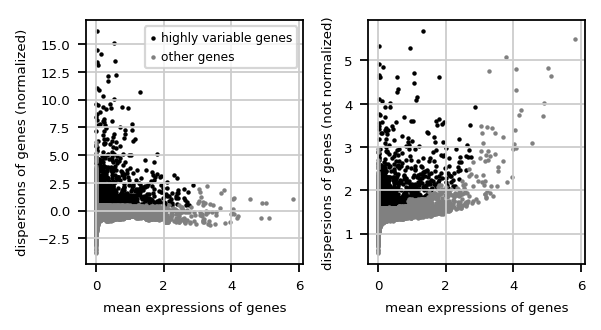

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    627 total control genes are used. (0:00:00)
computing score 'G2M_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    668 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:09)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:13)


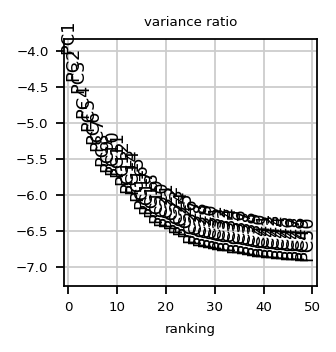

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:33)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering
    finished: found 12 clusters and added
    'fibro_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'fibro_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)


In [7]:
sc.pp.highly_variable_genes(fibroblasts, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fibroblasts, )
sc.tl.score_genes_cell_cycle(fibroblasts, s_genes=s_genes, g2m_genes=g2m_genes)
fibroblasts.raw = fibroblasts
fibroblasts = fibroblasts[:, fibroblasts.var.highly_variable]
sc.pp.regress_out(fibroblasts, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(fibroblasts, max_value=10)
sc.tl.pca(fibroblasts, svd_solver='arpack')
sc.pl.pca_variance_ratio(fibroblasts, n_pcs = 50, log=True)
sc.pp.neighbors(fibroblasts, n_pcs=20)
sc.tl.umap(fibroblasts)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.5", resolution = 0.5)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.3", resolution = 0.3)
sc.tl.leiden(fibroblasts, key_added="fibro_leiden_0.2", resolution = 0.2)

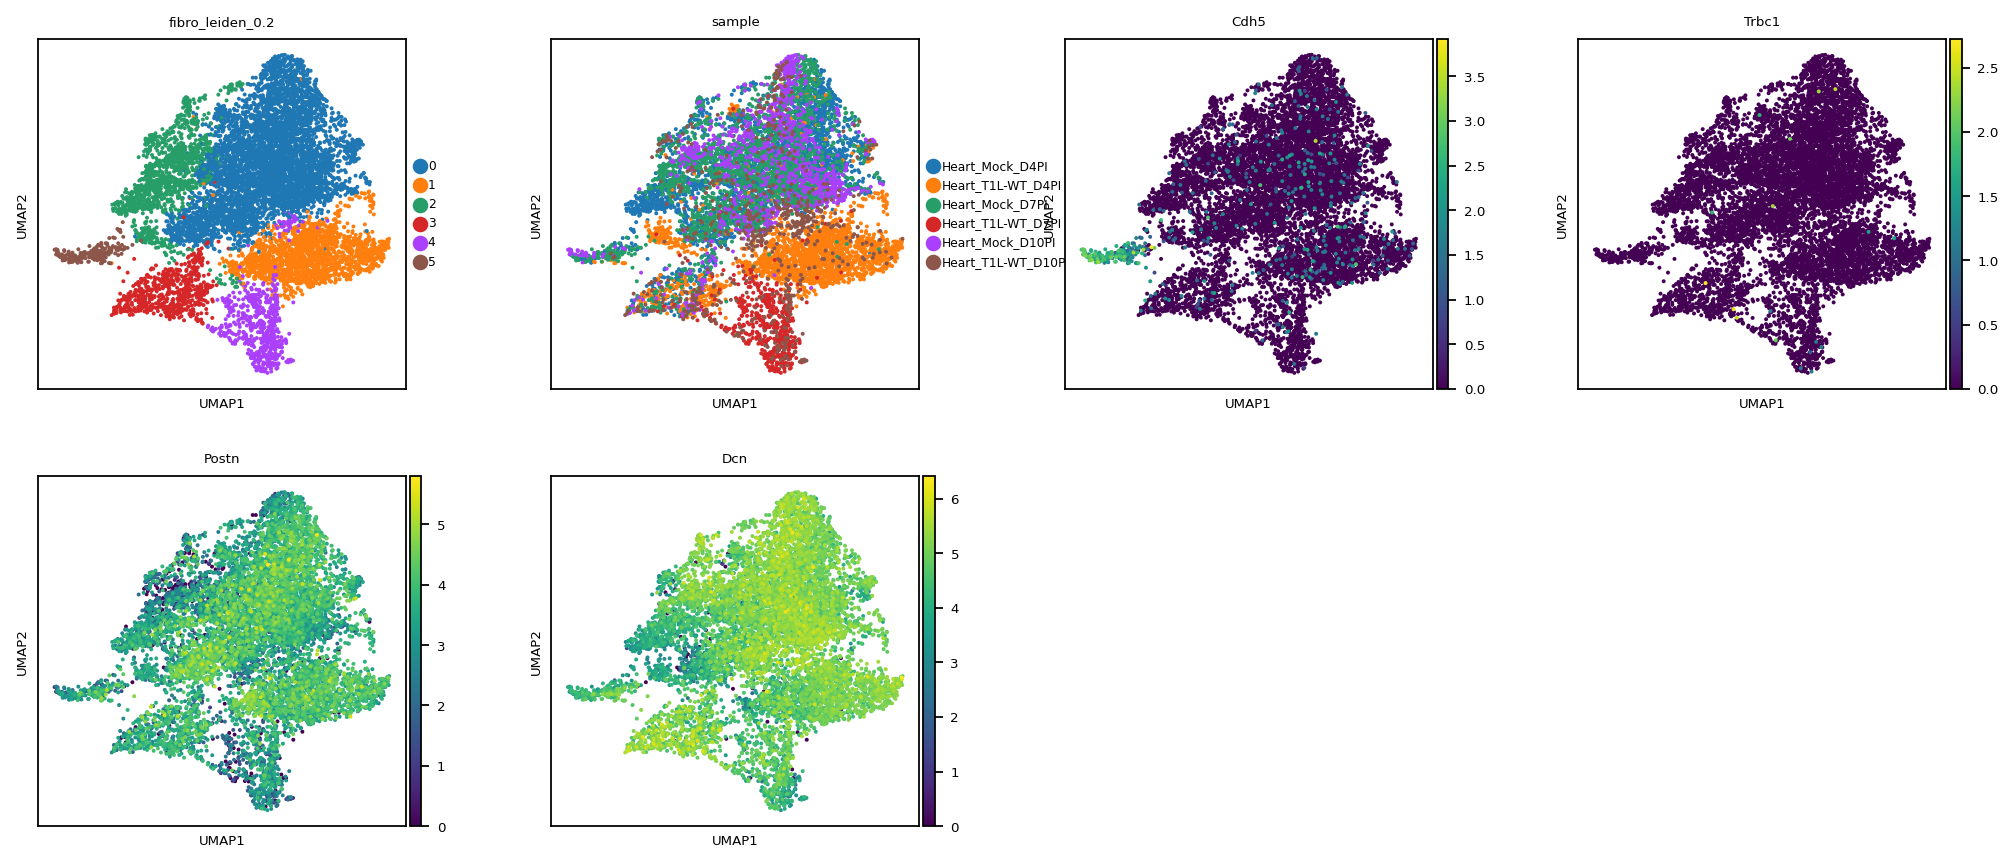

In [35]:
sc.pl.umap(fibroblasts, color = ["fibro_leiden_0.2", "sample", "Cdh5", "Trbc1", "Postn", "Dcn"])

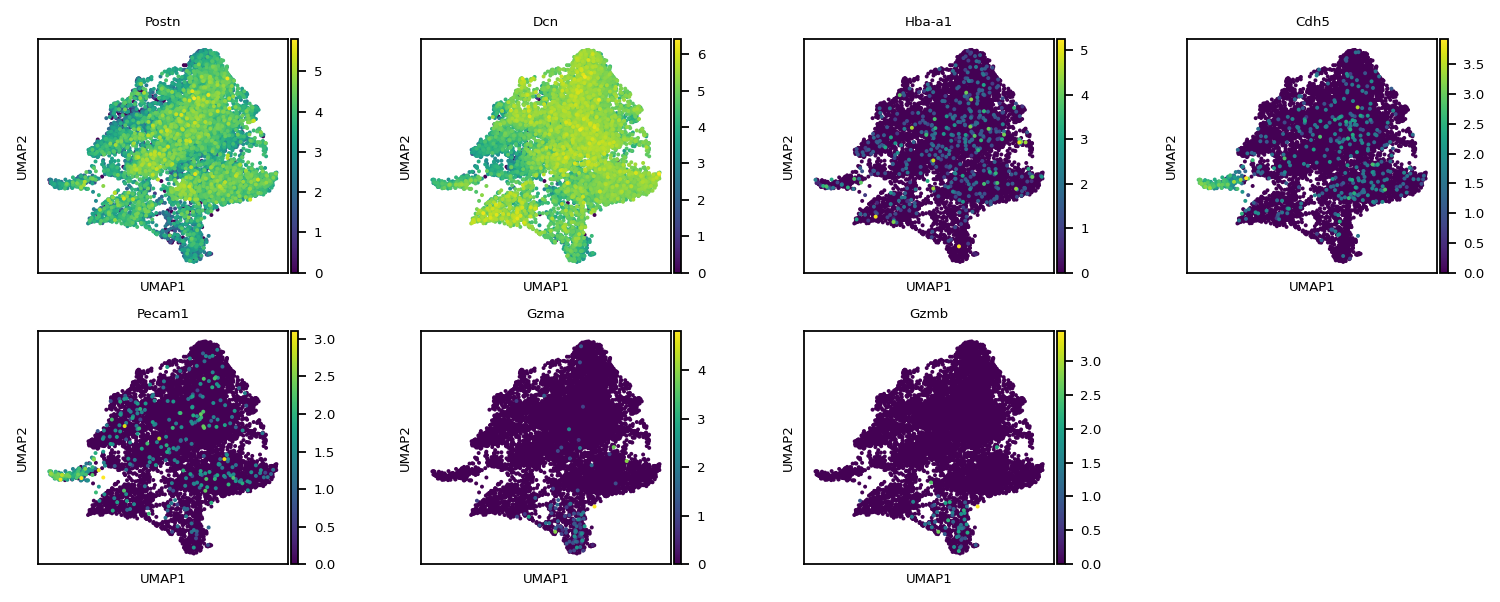

In [11]:
sc.pl.umap(fibroblasts, color = ["Postn", "Dcn", "Hba-a1", "Cdh5", "Pecam1", "Gzma", "Gzmb"])

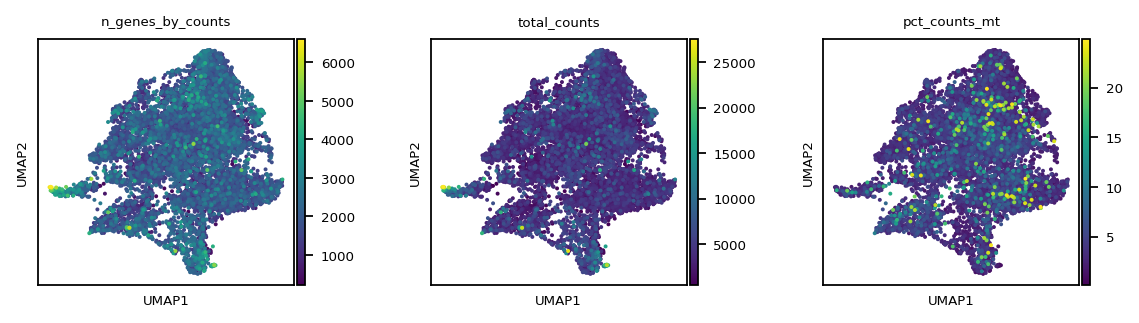

In [12]:
sc.pl.umap(fibroblasts, color = ['n_genes_by_counts', 'total_counts', "pct_counts_mt"], ncols=3)

In [28]:
sc.tl.rank_genes_groups(fibroblasts, groupby='fibro_leiden_0.2', method='wilcoxon', key_added='rank_genes_groups_fibro_leiden_0.2')

ranking genes
    finished: added to `.uns['rank_genes_groups_fibro_leiden_0.2']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


In [29]:
pd.DataFrame(fibroblasts.uns['rank_genes_groups_fibro_leiden_0.2']["names"]).head(20)

,0,1,2,3,4,5
0,Itm2a,Ifi27l2a,Eln,1500015O10Rik,H2-K1,Fabp4
1,Aspn,Ifitm3,Mfap4,Cd9,B2m,Gpihbp1
2,Lamc1,Bst2,Osr1,Timp3,H2-D1,Cdh5
3,Lamb1,Isg15,Gxylt2,Vim,Serping1,Cav1
4,Col15a1,Xist,Csrp2,Apoe,Iigp1,Egfl7
5,Akap12,Ly6e,Rbp1,Dkk3,H2-Q7,Cd36
6,Abca8a,Lgals3bp,Fbln5,Fmod,H2-T23,Cd93
7,Sept7,B2m,Cst3,Dbi,Ifitm3,Kdr
8,Pcsk6,Ifit3,Pmepa1,Thbs1,Ly6e,Pecam1
9,Lum,Irf7,Nupr1,Pdlim3,Bst2,Icam2


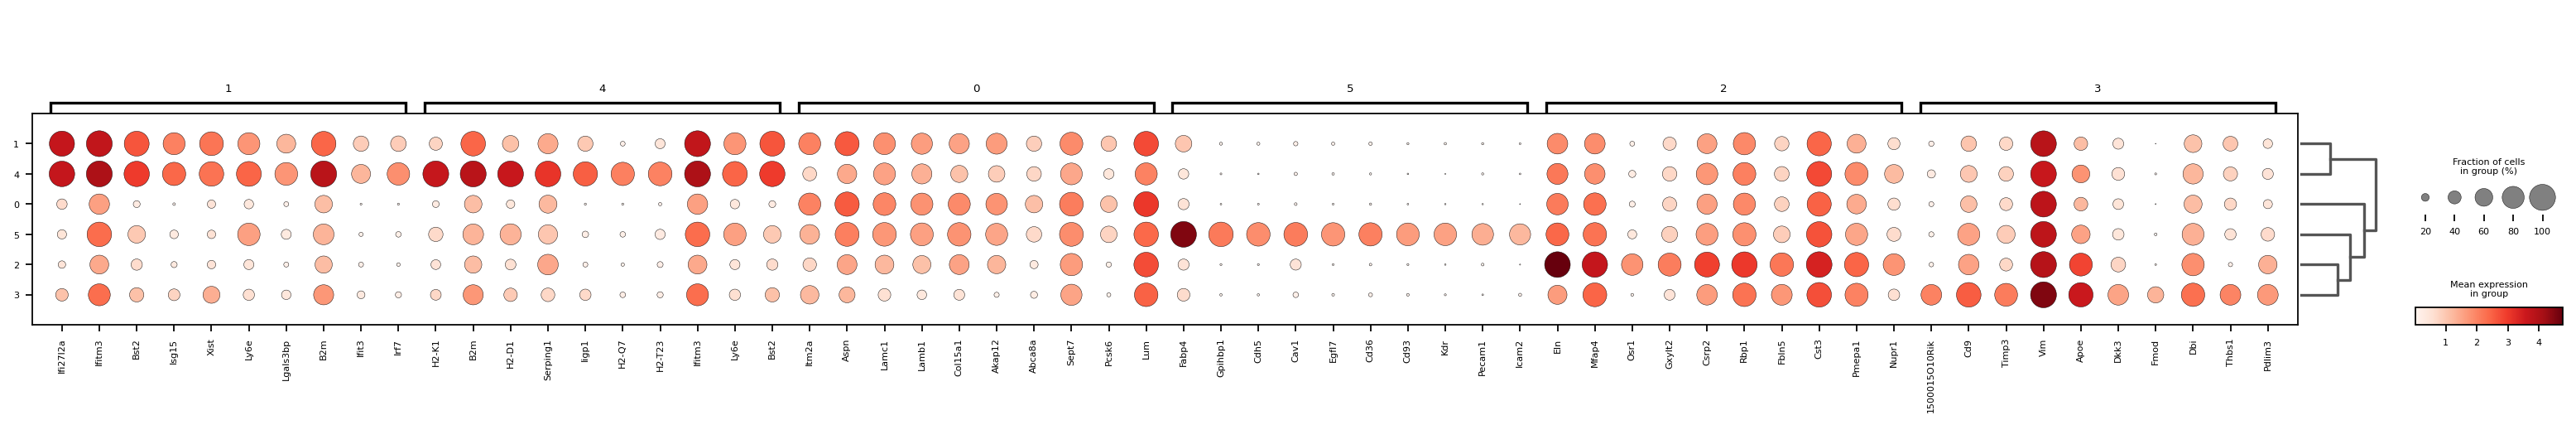

In [38]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(fibroblasts, key='rank_genes_groups_fibro_leiden_0.2', n_genes=10)

In [ ]:
# Cluster 5 represents endothelial cells: Cdh5+ and Pecam1+
# Removing endothelial cells

In [36]:
fibroblasts_only = fibroblasts[~fibroblasts.obs["fibro_leiden_0.2"].isin(["5"])]

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


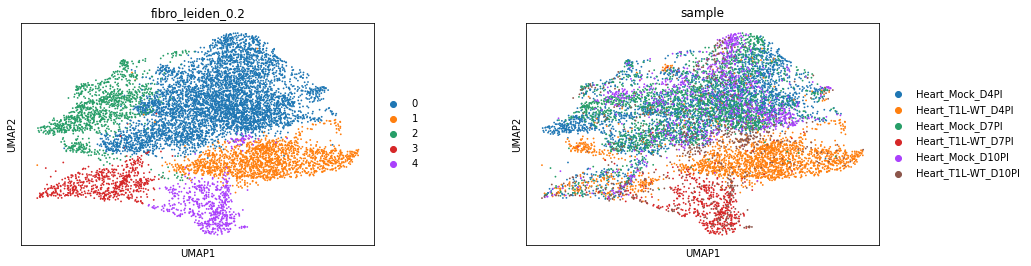

In [8]:
sc.pl.umap(fibroblasts_only, color = ["fibro_leiden_0.2", "sample"], wspace=0.3)

In [5]:
fibroblasts_only.obs["cell_phenotypes"] = fibroblasts_only.obs["fibro_leiden_0.2"]
phenotypes = {'0': "Uninflamed fibroblasts", 
                '1': "Inflamed fibroblasts", 
                "2" : "Uninflamed fibroblasts",
                '3': "Mesenchymal fibroblasts",
                '4': "Ccl2+ fibroblasts"}
fibroblasts_only.obs["cell_phenotypes"] = fibroblasts_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [40]:
sc.tl.rank_genes_groups(fibroblasts_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:14)


In [41]:
pd.DataFrame(fibroblasts_only.uns['rank_genes_groups_cell_phenotypes']["names"]).head(20)

,AP fibroblasts,Inflamed fibroblasts,Mesenchymal fibroblasts,Uninflamed fibroblasts
0,H2-K1,Ifi27l2a,1500015O10Rik,Col15a1
1,B2m,Ifitm3,Cd9,Col14a1
2,H2-D1,Bst2,Timp3,Mfap4
3,Serping1,Isg15,Vim,Lum
4,Iigp1,Xist,Apoe,Lama2
5,H2-Q7,Ly6e,Dkk3,Akap12
6,H2-T23,Lgals3bp,Fmod,Eln
7,Ifitm3,B2m,Dbi,Mfap5
8,Ly6e,Ifit3,Thbs1,Nedd4
9,Ly6a,Irf7,Pdlim3,Sptbn1


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_phenotypes']`


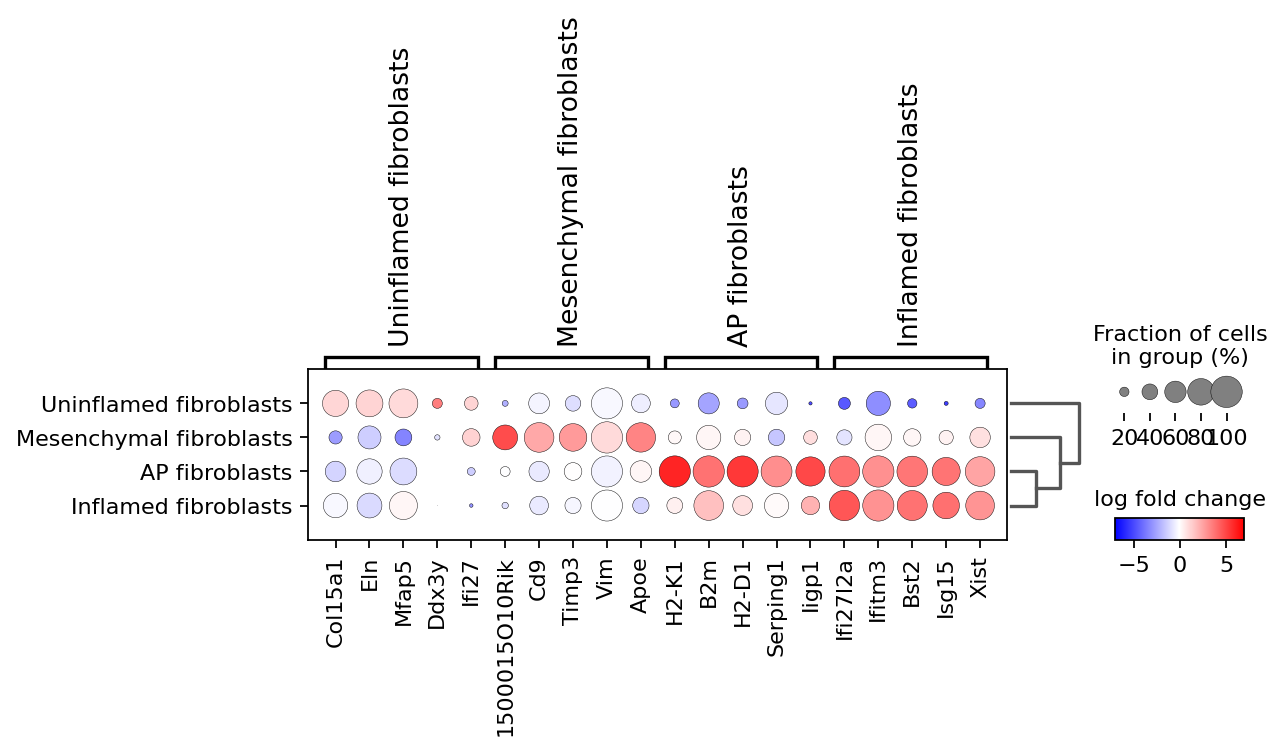

In [42]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (7.5,2.5))
sc.pl.rank_genes_groups_dotplot(fibroblasts_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_dotplot.pdf")

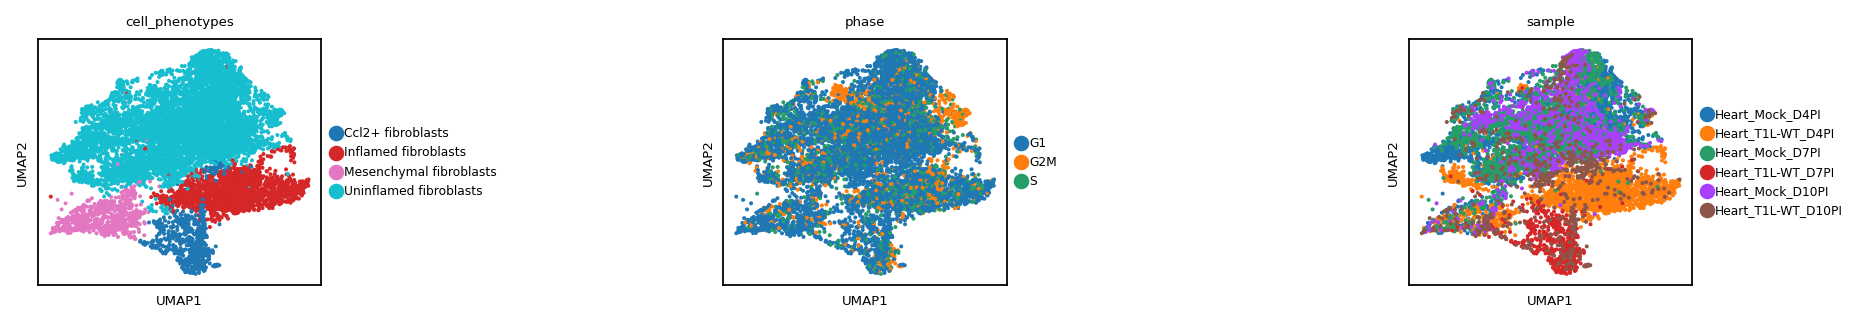

In [9]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.umap(fibroblasts_only, color = ["cell_phenotypes", "phase", "sample"], wspace=1.2)

In [60]:
pd.DataFrame(fibroblasts_only.uns['rank_genes_groups_cell_phenotypes']["names"]).head(20)

,AP fibroblasts,Inflamed fibroblasts,Mesenchymal fibroblasts,Uninflamed fibroblasts
0,H2-K1,Ifi27l2a,1500015O10Rik,Col15a1
1,B2m,Ifitm3,Cd9,Col14a1
2,H2-D1,Bst2,Timp3,Mfap4
3,Serping1,Isg15,Vim,Lum
4,Iigp1,Xist,Apoe,Lama2
5,H2-Q7,Ly6e,Dkk3,Akap12
6,H2-T23,Lgals3bp,Fmod,Eln
7,Ifitm3,B2m,Dbi,Mfap5
8,Ly6e,Ifit3,Thbs1,Nedd4
9,Ly6a,Irf7,Pdlim3,Sptbn1


In [46]:
fibroblasts_only.write_h5ad("./../pyobjs/fibroblasts_only.h5ad")

In [4]:
fibroblasts_only = sc.read_h5ad("./../pyobjs/fibroblasts_only.h5ad")

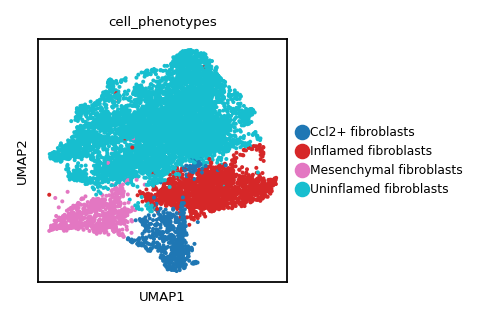

In [10]:
sc.pl.umap(fibroblasts_only, color = ["cell_phenotypes"])
sc.tl.rank_genes_groups(fibroblasts_only, groupby="cell_phenotypes", groups=["Inflamed fibroblasts"], reference="Uninflamed fibroblasts", key_added="inflamed_fibro_markers")
sc.tl.rank_genes_groups(fibroblasts_only, groupby="cell_phenotypes", groups=["Ccl2+ fibroblasts"], reference="Inflamed fibroblasts", key_added="ccl2_fibro_markers")

In [64]:
inflamed_fibro_markers = sc.get.rank_genes_groups_df(fibroblasts_only, group="Inflamed fibroblasts", key="inflamed_fibro_markers")
inflamed_fibro_markers.to_csv("./../csvs/fibroblast_only_inflamed_fibro_markers.csv")
print(inflamed_fibro_markers[1:40])

       names      scores  logfoldchanges          pvals      pvals_adj
1     Ifitm3  104.921051        3.439011   0.000000e+00   0.000000e+00
2       Bst2   97.072762        4.910641   0.000000e+00   0.000000e+00
3      Isg15   63.599098        5.613018   0.000000e+00   0.000000e+00
4       Xist   62.702412        3.590430   0.000000e+00   0.000000e+00
5       Ly6e   51.392807        3.222529   0.000000e+00   0.000000e+00
6        B2m   49.523350        2.270940   0.000000e+00   0.000000e+00
7   Lgals3bp   44.356625        3.944291  4.021841e-295  7.847059e-292
8       Irf7   35.943756        4.676294  4.302868e-213  6.868941e-210
9      Ifit3   34.384354        4.403646  1.591690e-199  2.329173e-196
10     Iigp1   33.335602        4.379376  3.801828e-190  5.135392e-187
11     Oasl2   32.043304        4.473872  3.901078e-178  4.893067e-175
12      Xaf1   29.985275        3.506846  2.317784e-161  2.543768e-158
13     Ifit1   29.280970        4.816511  7.959758e-154  8.221962e-151
14    

In [11]:
ccl2_fibro_markers = sc.get.rank_genes_groups_df(fibroblasts_only, group="Ccl2+ fibroblasts", key="ccl2_fibro_markers")
ccl2_fibro_markers.to_csv("./../csvs/fibroblast_only_ccl2_fibro_markers.csv")
print(ccl2_fibro_markers[1:40])

        names     scores  logfoldchanges          pvals      pvals_adj
1       H2-D1  63.712193        4.180132   0.000000e+00   0.000000e+00
2         B2m  47.170563        2.153748  3.952525e-322  2.313546e-318
3       H2-Q7  44.070107        5.071462  3.423745e-212  1.202419e-208
4    Serping1  41.312679        2.711020  2.776083e-247  1.218700e-243
5      H2-T23  36.606014        3.457091  1.212170e-182  3.547617e-179
6          C3  30.489443        6.741664  2.970226e-126  4.741561e-123
7       Iigp1  29.958311        2.749401  2.085935e-145  5.232718e-142
8        Ly6a  28.969803        3.116152  2.065539e-135  4.533858e-132
9       Psmb8  28.043966        2.619545  4.435212e-128  8.653591e-125
10      Psmb9  27.000263        3.328652  1.892196e-114  2.555921e-111
11       C1ra  26.464794        4.486020  2.360422e-106  2.763267e-103
12     Ms4a4d  26.098656        3.437836  4.190342e-108  5.255886e-105
13  Serpina3n  25.900759        6.777388  7.591593e-101   7.406021e-98
14    

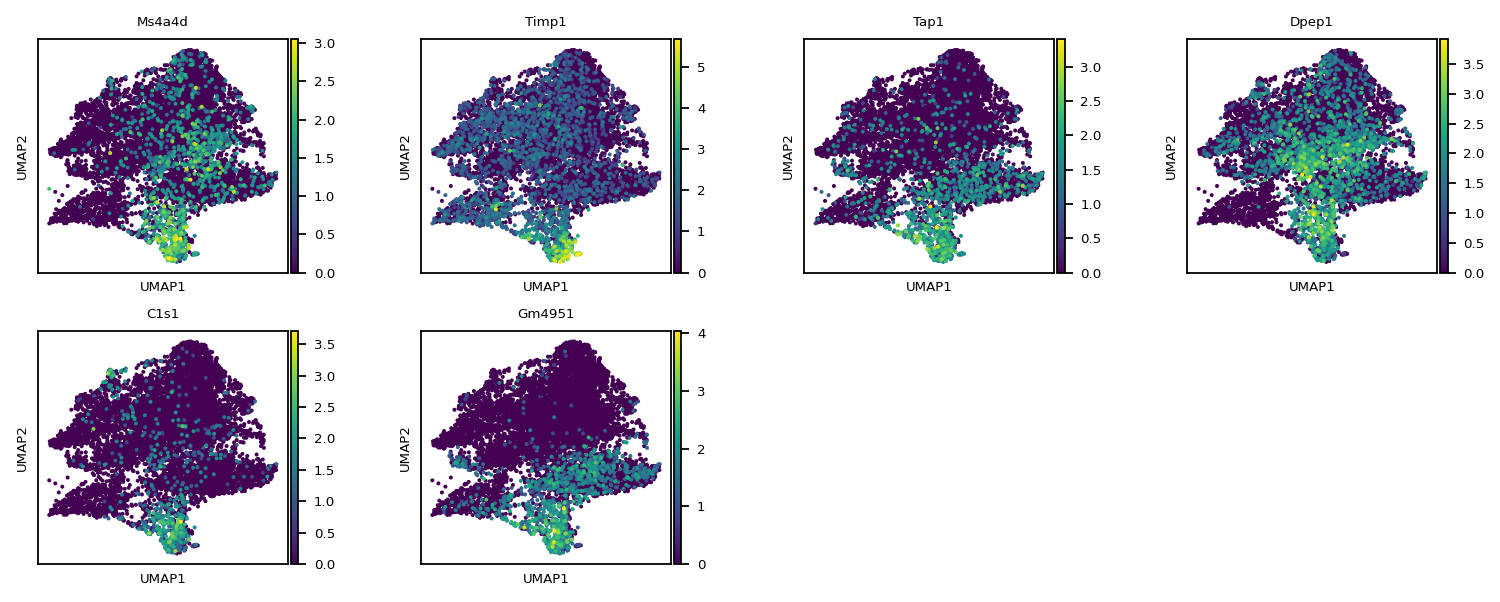

In [12]:
sc.pl.umap(fibroblasts_only, color = ["Ms4a4d", "Timp1", "Tap1", "Dpep1", "C1s1", "Gm4951"])

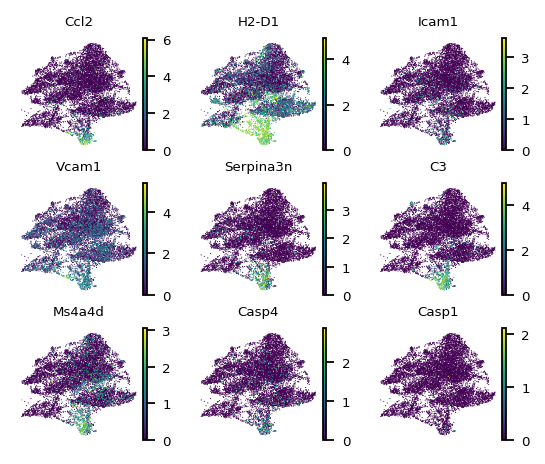

In [13]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.0, 1.0), transparent=True, format="pdf")
sc.pl.umap(fibroblasts_only, color = ["Ccl2", "H2-D1", "Icam1", "Vcam1", "Serpina3n", "C3", "Ms4a4d", "Casp4", "Casp1"], size=1, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=3, frameon=False, add_outline=False)# plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))